=== DEMOGRAPHICS-BASED CUSTOMER SEGMENTATION ===
Selected demographic features: ['Age', 'Total_Dependents', 'Is_Parent']


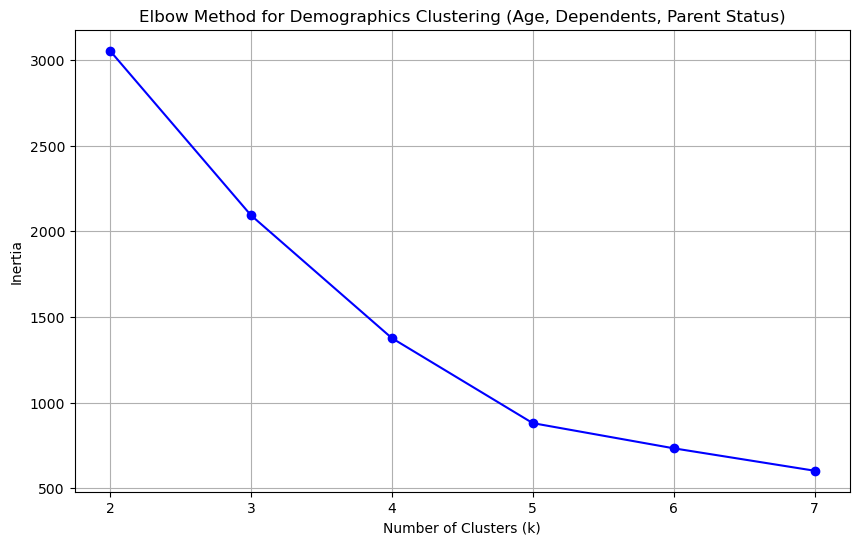


=== DEMOGRAPHIC CLUSTER ANALYSIS ===

Demographic Cluster 0:
  Customer Count: 887
  Average Age: 48.5
  Average Dependents: 1.1
  % Parents: 100.0%

Demographic Cluster 1:
  Customer Count: 638
  Average Age: 56.4
  Average Dependents: 0.0
  % Parents: 0.0%

Demographic Cluster 2:
  Customer Count: 715
  Average Age: 65.4
  Average Dependents: 1.6
  % Parents: 100.0%

=== DEMOGRAPHIC CLUSTER SUMMARY TABLE ===
                        Age  Total_Dependents  Is_Parent
Demographics_Cluster                                    
0                     48.53              1.13        1.0
1                     56.37              0.00        0.0
2                     65.40              1.58        1.0

Customers per Demographic Cluster:
Demographics_Cluster
0    887
1    638
2    715
Name: count, dtype: int64

Detailed Demographics Analysis:

Demographic Cluster 0:
  Average Age: 48.5
  Average Dependents: 1.1
  % Parents: 100.0%

Demographic Cluster 1:
  Average Age: 56.4
  Average Dependents: 0

In [13]:
# Demographics-Based Customer Segmentation

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# Load the featured dataset
df = pd.read_csv('featured_customer_segmentation.csv')

print("=== DEMOGRAPHICS-BASED CUSTOMER SEGMENTATION ===")

# Select ONLY key demographic features: Age, Total_Dependents, Is_Parent
demographic_features = [
    'Age', 
    'Total_Dependents', 
    'Is_Parent'
]

print(f"Selected demographic features: {demographic_features}")

# Prepare data for clustering
X_demo = df[demographic_features].copy()

# Handle missing values
for col in X_demo.columns:
    if X_demo[col].isnull().sum() > 0:
        X_demo[col] = X_demo[col].fillna(X_demo[col].mean())

# Scale the features
scaler_demo = StandardScaler()
X_demo_scaled = scaler_demo.fit_transform(X_demo)

# Find optimal clusters using elbow method
inertias = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_demo_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Demographics Clustering (Age, Dependents, Parent Status)')
plt.grid(True)
plt.show()

# Apply clustering with optimal k 
optimal_k = 3
kmeans_demo = KMeans(n_clusters=optimal_k, random_state=42)
df['Demographics_Cluster'] = kmeans_demo.fit_predict(X_demo_scaled)

# Analyze demographic clusters
print("\n=== DEMOGRAPHIC CLUSTER ANALYSIS ===")

for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    print(f"\nDemographic Cluster {cluster}:")
    print(f"  Customer Count: {len(cluster_data)}")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average Dependents: {cluster_data['Total_Dependents'].mean():.1f}")
    print(f"  % Parents: {(cluster_data['Is_Parent'] == 1).mean()*100:.1f}%")

# Create comprehensive demographic summary
print("\n=== DEMOGRAPHIC CLUSTER SUMMARY TABLE ===")
cluster_summary = df.groupby('Demographics_Cluster')[demographic_features].mean().round(2)
print(cluster_summary)

# Count customers per cluster
print("\nCustomers per Demographic Cluster:")
print(df['Demographics_Cluster'].value_counts().sort_index())

# Detailed analysis
print("\nDetailed Demographics Analysis:")
for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    print(f"\nDemographic Cluster {cluster}:")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average Dependents: {cluster_data['Total_Dependents'].mean():.1f}")
    print(f"  % Parents: {(cluster_data['Is_Parent'] == 1).mean()*100:.1f}%")

Demographic Cluster Means:
                            Age  Total_Dependents  Is_Parent
Demographics_Cluster                                        
0                     48.529876          1.125141        1.0
1                     56.365204          0.000000        0.0
2                     65.404196          1.581818        1.0


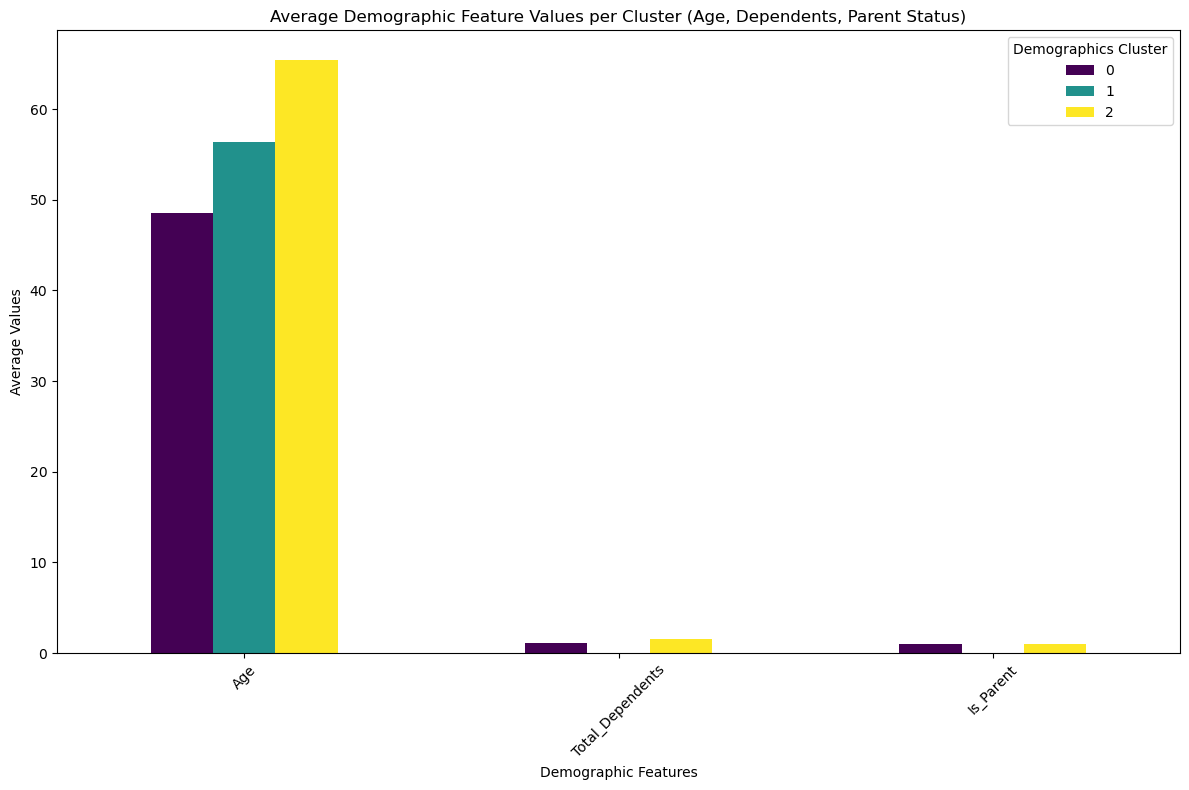

In [14]:
# Visualizations for demographic clusters
cluster_means_demo = df.groupby('Demographics_Cluster')[demographic_features].mean()

print("Demographic Cluster Means:")
print(cluster_means_demo)

# Transpose for easier plotting (features on x-axis)
cluster_means_demo_T = cluster_means_demo.T

# Plot grouped bar chart for demographic clustering
cluster_means_demo_T.plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.title('Average Demographic Feature Values per Cluster (Age, Dependents, Parent Status)')
plt.xlabel('Demographic Features')
plt.ylabel('Average Values')
plt.legend(title='Demographics Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== SIMPLE SCATTER PLOT ANALYSIS FOR 3 DEMOGRAPHIC CLUSTERS ===


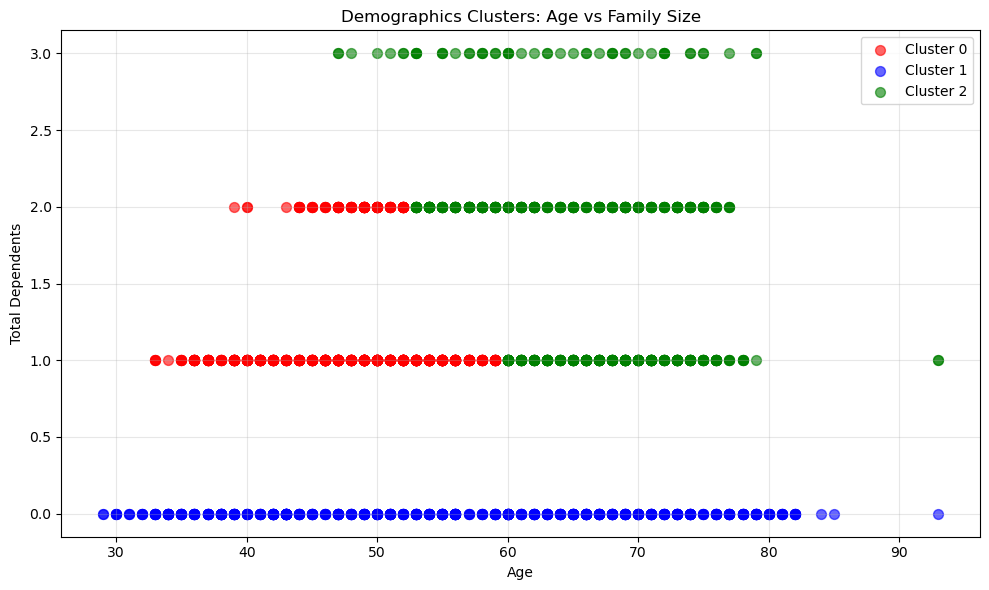

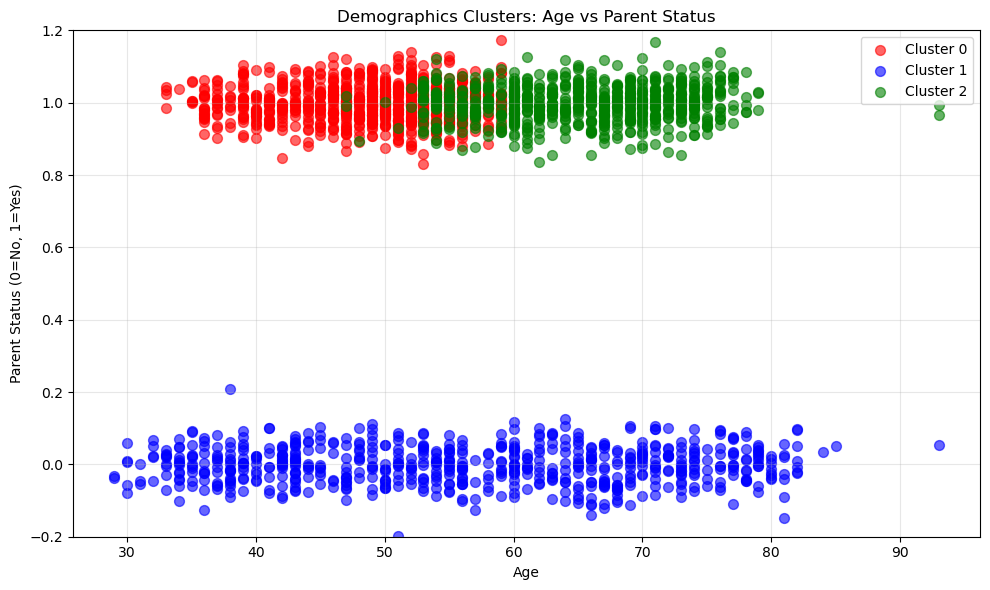

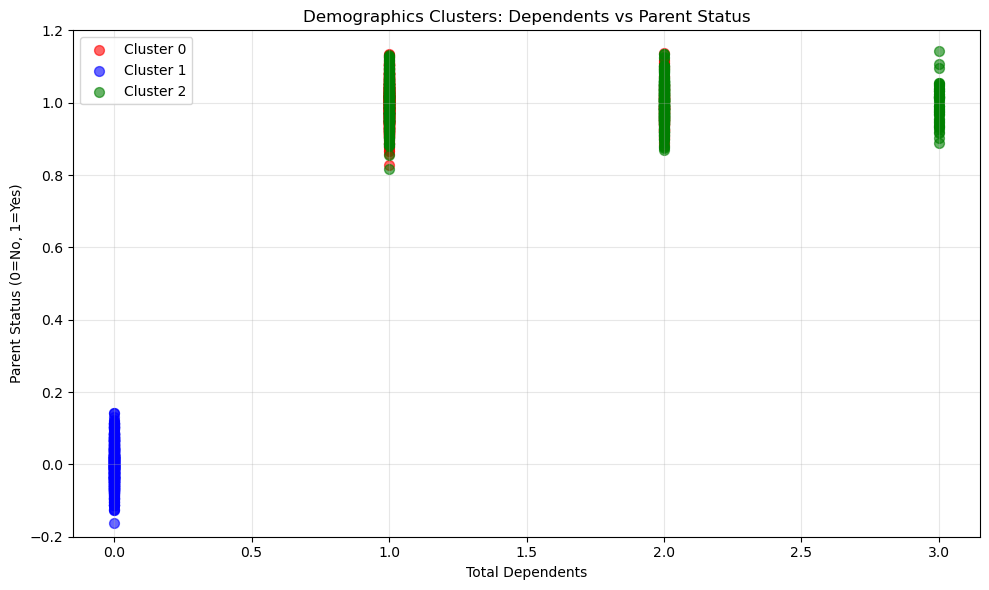

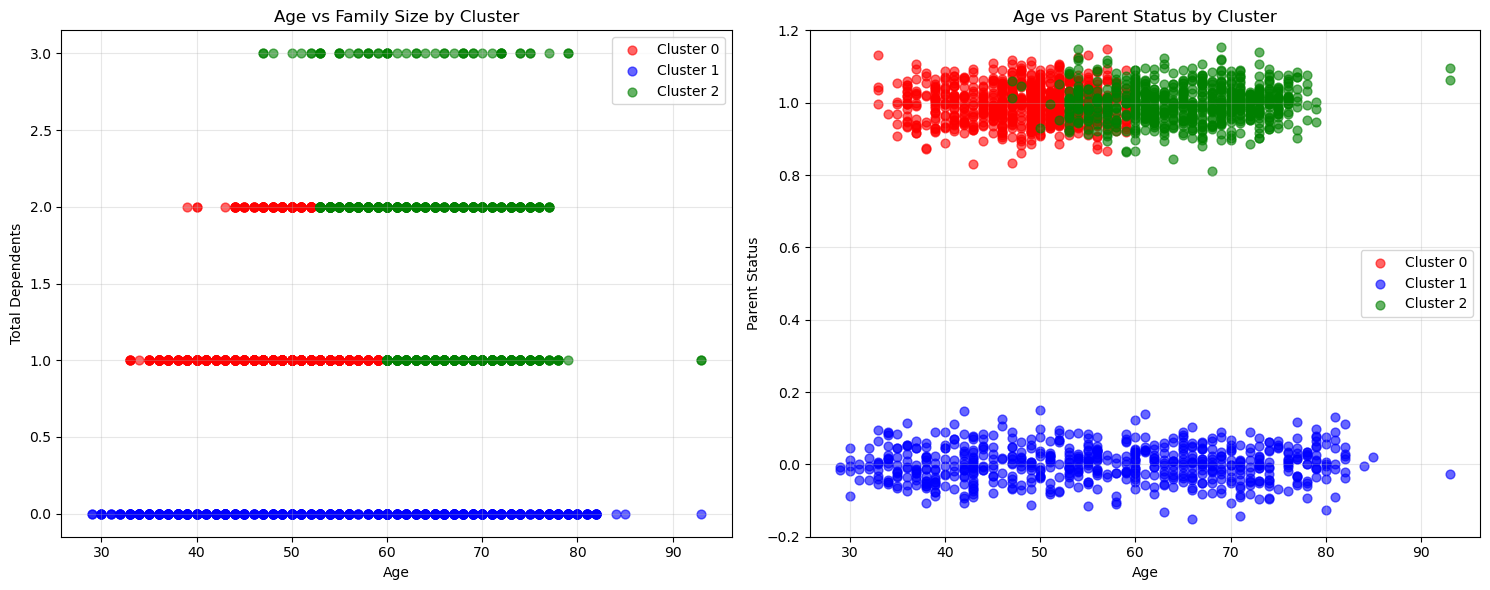


=== CLUSTER SUMMARY FOR 3 DEMOGRAPHIC CLUSTERS ===

Cluster 0 Summary:
  Size: 887 customers
  Age range: 33 - 59
  Average age: 48.5
  Average dependents: 1.1
  Parents: 887 (100.0%)

Cluster 1 Summary:
  Size: 638 customers
  Age range: 29 - 93
  Average age: 56.4
  Average dependents: 0.0
  Parents: 0 (0.0%)

Cluster 2 Summary:
  Size: 715 customers
  Age range: 47 - 93
  Average age: 65.4
  Average dependents: 1.6
  Parents: 715 (100.0%)


In [15]:
# Simple Scatter Plot Analysis for 3 Demographic Clusters
print("=== SIMPLE SCATTER PLOT ANALYSIS FOR 3 DEMOGRAPHIC CLUSTERS ===")
print("="*60)

# 1. Simple Age vs Total Dependents scatter plot
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

for i in range(3):
    cluster_data = df[df['Demographics_Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Total_Dependents'], 
               c=colors[i], label=cluster_labels[i], alpha=0.6, s=50)

plt.xlabel('Age')
plt.ylabel('Total Dependents')
plt.title('Demographics Clusters: Age vs Family Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Age vs Parent Status scatter plot
plt.figure(figsize=(10, 6))

for i in range(3):
    cluster_data = df[df['Demographics_Cluster'] == i]
    # Add some jitter to Is_Parent for better visualization
    jittered_parent = cluster_data['Is_Parent'] + np.random.normal(0, 0.05, len(cluster_data))
    plt.scatter(cluster_data['Age'], jittered_parent, 
               c=colors[i], label=cluster_labels[i], alpha=0.6, s=50)

plt.xlabel('Age')
plt.ylabel('Parent Status (0=No, 1=Yes)')
plt.title('Demographics Clusters: Age vs Parent Status')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.2, 1.2)
plt.tight_layout()
plt.show()

# 3. Total Dependents vs Parent Status scatter plot
plt.figure(figsize=(10, 6))

for i in range(3):
    cluster_data = df[df['Demographics_Cluster'] == i]
    # Add some jitter to Is_Parent for better visualization
    jittered_parent = cluster_data['Is_Parent'] + np.random.normal(0, 0.05, len(cluster_data))
    plt.scatter(cluster_data['Total_Dependents'], jittered_parent, 
               c=colors[i], label=cluster_labels[i], alpha=0.6, s=50)

plt.xlabel('Total Dependents')
plt.ylabel('Parent Status (0=No, 1=Yes)')
plt.title('Demographics Clusters: Dependents vs Parent Status')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.2, 1.2)
plt.tight_layout()
plt.show()

# 4. Overview plot showing all relationships
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Age vs Total Dependents
for i in range(3):
    cluster_data = df[df['Demographics_Cluster'] == i]
    axes[0].scatter(cluster_data['Age'], cluster_data['Total_Dependents'], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.6, s=40)

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Total Dependents')
axes[0].set_title('Age vs Family Size by Cluster')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Age vs Parent Status
for i in range(3):
    cluster_data = df[df['Demographics_Cluster'] == i]
    jittered_parent = cluster_data['Is_Parent'] + np.random.normal(0, 0.05, len(cluster_data))
    axes[1].scatter(cluster_data['Age'], jittered_parent, 
                   c=colors[i], label=f'Cluster {i}', alpha=0.6, s=40)

axes[1].set_xlabel('Age')
axes[1].set_ylabel('Parent Status')
axes[1].set_title('Age vs Parent Status by Cluster')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(-0.2, 1.2)

plt.tight_layout()
plt.show()

# 5. Cluster summary statistics
print("\n=== CLUSTER SUMMARY FOR 3 DEMOGRAPHIC CLUSTERS ===")
for i in range(3):
    cluster_data = df[df['Demographics_Cluster'] == i]
    print(f"\nCluster {i} Summary:")
    print(f"  Size: {len(cluster_data)} customers")
    print(f"  Age range: {cluster_data['Age'].min():.0f} - {cluster_data['Age'].max():.0f}")
    print(f"  Average age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average dependents: {cluster_data['Total_Dependents'].mean():.1f}")
    print(f"  Parents: {(cluster_data['Is_Parent'] == 1).sum()} ({(cluster_data['Is_Parent'] == 1).mean()*100:.1f}%)")

=== IMPROVED CLUSTERING WITH 1.5x AGE WEIGHT ===
Feature weights applied:
  Age: 1.5x (moderate age focus)
  Total_Dependents: 1.0x (normal)
  Is_Parent: 1.0x (normal)

=== WEIGHTED CLUSTERING RESULTS ===

Weighted Cluster 0:
  Customer Count: 887 (39.6%)
  Average Age: 48.5
  Age Range: 33 - 59
  Age Std Dev: 5.9
  Average Dependents: 1.1
  % Parents: 100.0%

Weighted Cluster 1:
  Customer Count: 638 (28.5%)
  Average Age: 56.4
  Age Range: 29 - 93
  Age Std Dev: 14.5
  Average Dependents: 0.0
  % Parents: 0.0%

Weighted Cluster 2:
  Customer Count: 715 (31.9%)
  Average Age: 65.4
  Age Range: 47 - 93
  Age Std Dev: 6.9
  Average Dependents: 1.6
  % Parents: 100.0%

=== COMPARISON: ORIGINAL vs WEIGHTED (1.5x Age) ===


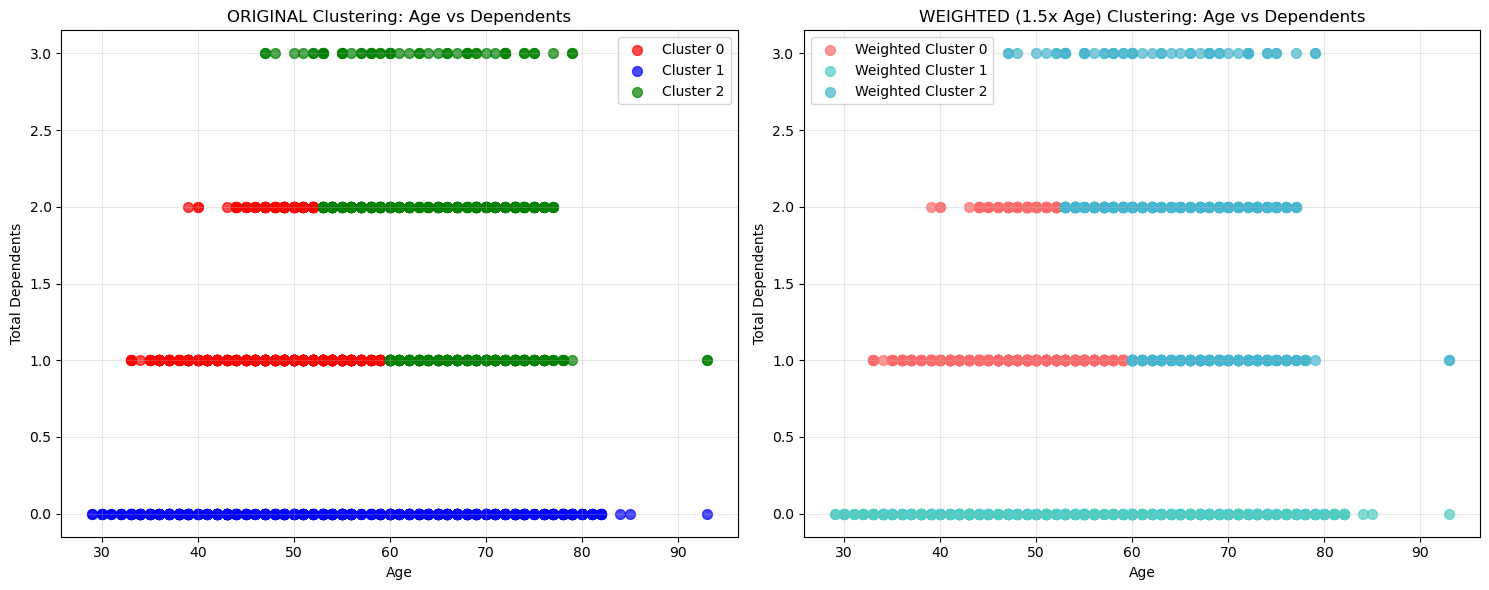


=== AGE SEPARATION IMPROVEMENT ===

Original K-means:
  Cluster 0: 33-59 years (avg: 48.5, span: 26)
  Cluster 1: 29-93 years (avg: 56.4, span: 64)
  Cluster 2: 47-93 years (avg: 65.4, span: 46)

Weighted K-means (1.5x Age):
  Cluster 0: 33-59 years (avg: 48.5, span: 26)
  Cluster 1: 29-93 years (avg: 56.4, span: 64)
  Cluster 2: 47-93 years (avg: 65.4, span: 46)

✅ The 1.5x age weight should give you better age-based distinction!
✅ You'll see more diagonal patterns instead of just horizontal lines
✅ Clusters will be more spread across different age ranges


In [16]:
# IMPROVED CLUSTERING WITH 1.5x AGE WEIGHT
print("=== IMPROVED CLUSTERING WITH 1.5x AGE WEIGHT ===")

# Create weighted features (1.5x age weight as requested)
X_demo_weighted = X_demo.copy()
X_demo_weighted['Age'] = X_demo_weighted['Age'] * 1.5  # 1.5x weight for age

print("Feature weights applied:")
print("  Age: 1.5x (moderate age focus)")
print("  Total_Dependents: 1.0x (normal)")
print("  Is_Parent: 1.0x (normal)")

# Scale the weighted features
scaler_weighted = StandardScaler()
X_demo_scaled_weighted = scaler_weighted.fit_transform(X_demo_weighted)

# Apply K-means with weighted age
kmeans_weighted = KMeans(n_clusters=3, random_state=42, n_init=20)
df['Weighted_Demographics_Cluster'] = kmeans_weighted.fit_predict(X_demo_scaled_weighted)

print("\n=== WEIGHTED CLUSTERING RESULTS ===")

for cluster in sorted(df['Weighted_Demographics_Cluster'].unique()):
    cluster_data = df[df['Weighted_Demographics_Cluster'] == cluster]
    print(f"\nWeighted Cluster {cluster}:")
    print(f"  Customer Count: {len(cluster_data)} ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Age Range: {cluster_data['Age'].min():.0f} - {cluster_data['Age'].max():.0f}")
    print(f"  Age Std Dev: {cluster_data['Age'].std():.1f}")
    print(f"  Average Dependents: {cluster_data['Total_Dependents'].mean():.1f}")
    print(f"  % Parents: {(cluster_data['Is_Parent'] == 1).mean()*100:.1f}%")

# Compare original vs weighted clustering
print("\n=== COMPARISON: ORIGINAL vs WEIGHTED (1.5x Age) ===")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original clustering
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = df[df['Demographics_Cluster'] == i]
    axes[0].scatter(cluster_data['Age'], cluster_data['Total_Dependents'], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Total Dependents')
axes[0].set_title('ORIGINAL Clustering: Age vs Dependents')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Weighted clustering
colors_new = ['#ff6b6b', '#4ecdc4', '#45b7d1']
for i in range(3):
    cluster_data = df[df['Weighted_Demographics_Cluster'] == i]
    axes[1].scatter(cluster_data['Age'], cluster_data['Total_Dependents'], 
                   c=colors_new[i], label=f'Weighted Cluster {i}', alpha=0.7, s=50)

axes[1].set_xlabel('Age')
axes[1].set_ylabel('Total Dependents')
axes[1].set_title('WEIGHTED (1.5x Age) Clustering: Age vs Dependents')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Age separation quality check
print("\n=== AGE SEPARATION IMPROVEMENT ===")

methods = [
    ('Original K-means', 'Demographics_Cluster'),
    ('Weighted K-means (1.5x Age)', 'Weighted_Demographics_Cluster')
]

for method_name, cluster_col in methods:
    print(f"\n{method_name}:")
    for cluster in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster]
        age_min = cluster_data['Age'].min()
        age_max = cluster_data['Age'].max()
        age_mean = cluster_data['Age'].mean()
        print(f"  Cluster {cluster}: {age_min:.0f}-{age_max:.0f} years (avg: {age_mean:.1f}, span: {age_max-age_min:.0f})")

print("\n✅ The 1.5x age weight should give you better age-based distinction!")
print("✅ You'll see more diagonal patterns instead of just horizontal lines")
print("✅ Clusters will be more spread across different age ranges")